In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

%cd /content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/evaluation/

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/BAMT-GAN/evaluation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def plot_results(df, dataset_name):
    metrics = ['accuracy', 'auc', 'f1']
    x_ticks_labels = ['raw','20%', '40%', '60%', '80%', '100%', '120%', '140%', '160%', '180%', '200%']
    x_ticks_values = [i for i in range(11)]

    # Define the colors with clear distinction
    algorithms = ['DT', 'KNN', 'LR', 'RF', 'GBM', 'XGBOOST', 'LIGHTGBM', 'CATBOOST', 'LINEARSVM', 'ADABOOST']
    colors = ['#ff4f4f', '#ff924f', '#ffe24f', '#90ff4f', '#42d6af', '#429bd6', '#354db8', '#6317b0', '#f017ff', '#d11167','#f77e98']
    markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D']
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--',':']

    styles = {alg: {'color': col, 'marker': mk, 'linestyle': ls}
              for alg, col, mk, ls in zip(algorithms, colors, markers, linestyles)}

    for metric in metrics:
        fig, ax = plt.subplots(figsize=(10, 6))

        for column in df.columns:
            # Exclude columns that start with 'svm', 'NaiveBayes', 'MLP'
            if column.startswith(('SVM', 'NaiveBayes', 'MLP')):
                continue

            if metric in column and 'mean' in column:
                # Split by '_' and take the first part as the label
                label = column.split('_')[0].upper()

                # Create the plot with different color, marker and linestyle for each algorithm
                ax.plot(df[column], label=label,
                        color=styles[label]['color'],
                        marker=styles[label]['marker'],
                        linestyle=styles[label]['linestyle'])

                # Add a special marker for the best performance
                best_performance_index = df[column].idxmax()
                ax.plot(best_performance_index, df[column].loc[best_performance_index], marker='*', color='red', markersize=20)

        ax.set_xlabel('AUGMENTATION RATIO')
        ax.set_xticks(x_ticks_values)
        ax.set_xticklabels(x_ticks_labels)

         # Set ylabel based on the metric
        if metric == 'f1':
            ax.set_ylabel('F1-SCORE')
            ax.set_title(f'F1-SCORE OVER AUGMENTATION RATIOS ({dataset_name.upper()} DATA)')  # Convert the title to uppercase
        else:
            ax.set_ylabel(f'{metric.upper()}')
            ax.set_title(f'{metric.upper()} OVER AUGMENTATION RATIOS ({dataset_name.upper()} DATA)')  # Convert the title to uppercase

        ax.legend(loc='best', framealpha=0.0)  # Set the transparency of the legend background


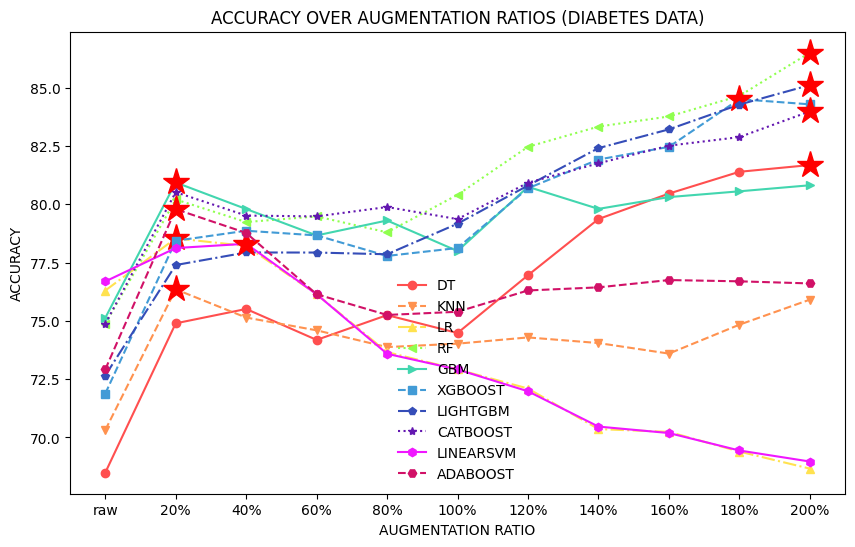

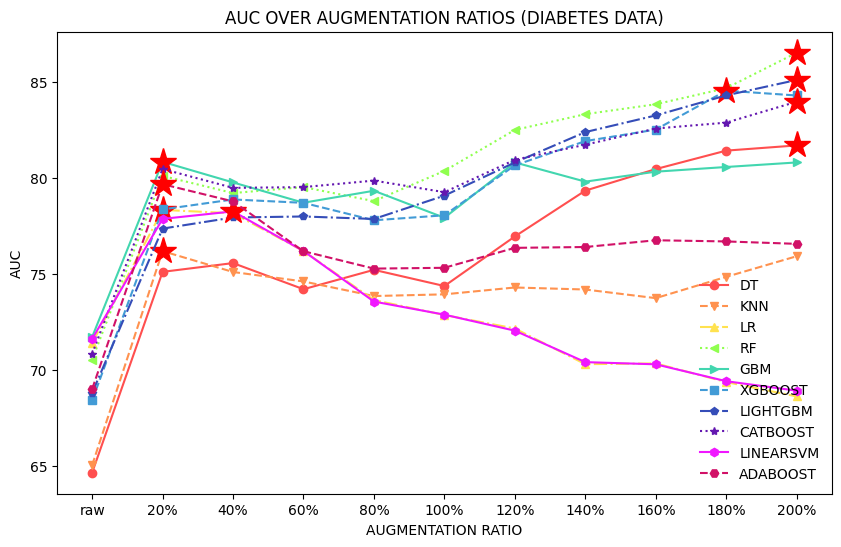

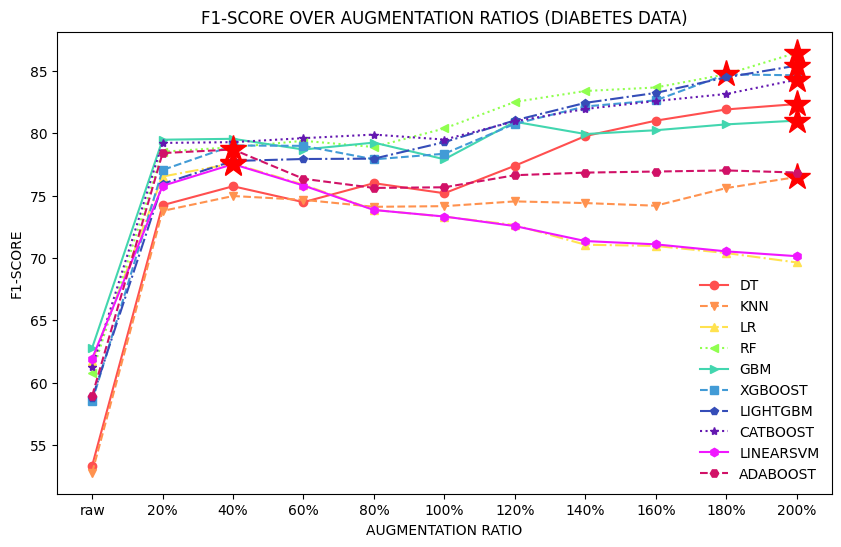

In [ ]:
diabetes_bamtgan= pd.read_csv('../result_metrics/diabetes_bamtgan.csv')
plot_results(diabetes_bamtgan,'diabetes')